In [45]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')

In [22]:
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [23]:
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
clf = RandomForestClassifier(random_state=0)

In [25]:
parameters = {'n_estimators': range(10, 50, 10),
              'max_depth': range(1, 12, 2),
              'min_samples_leaf': range(1, 7),
              'min_samples_split': range(2, 9, 2)}

In [26]:
grid_search = GridSearchCV(clf, parameters, cv=3, n_jobs=-1)

In [27]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [28]:
grid_search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [29]:
best_clf = grid_search.best_estimator_
best_clf.score(X_test, y_test)

1.0

In [61]:
feature_importances_df = pd.DataFrame({'importances': best_clf.feature_importances_},
                                       index=X_train.columns)\
                                       .sort_values('importances', ascending=False)

In [62]:
feature_importances_df

,importances
odor,0.183010
stalk-root,0.101771
gill-color,0.099656
gill-spacing,0.094063
gill-size,0.079553
ring-type,0.068616
bruises,0.066329
habitat,0.056849
population,0.041296
stalk-surface-below-ring,0.040378


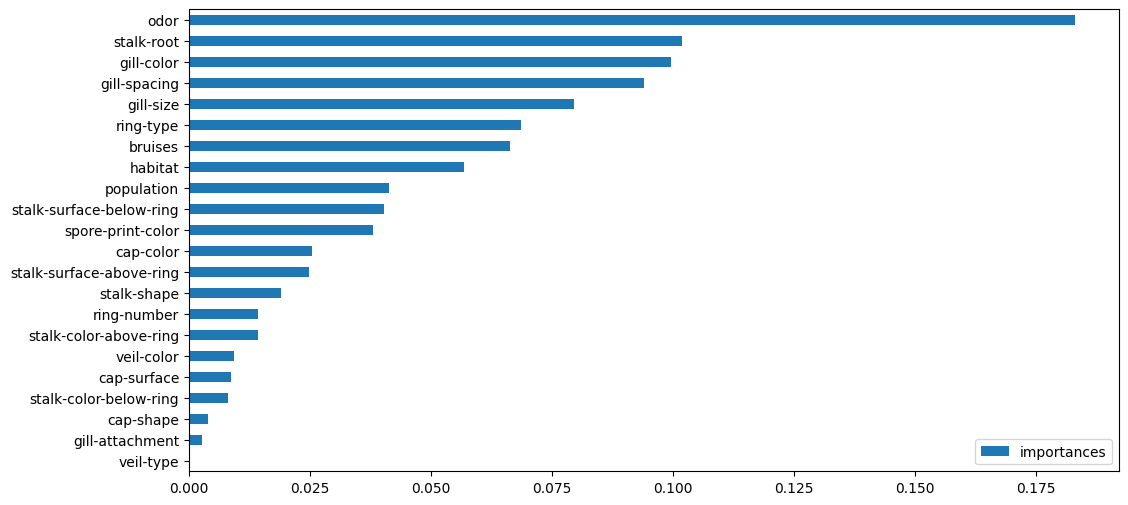

In [70]:
feature_importances_df.sort_values('importances').plot(kind='barh', figsize=(12, 6));

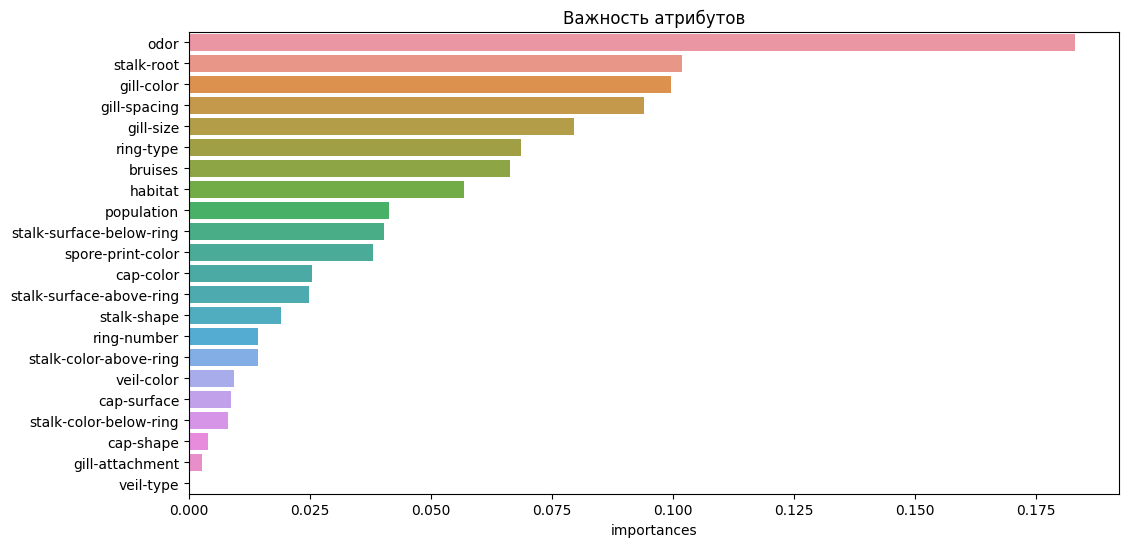

In [71]:
plt.figure(figsize=(12, 6))
sns.barplot(y=feature_importances_df.index,
            x=feature_importances_df['importances'])
plt.title('Важность атрибутов');